In [1]:
#common packages we basically always need
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from time import time,sleep
import math


{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Oct 18 19:00:09 2017', '__version__': '1.0', '__globals__': [], 'testX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'testY': array([[7, 2, 1, ..., 4, 5, 6]], dtype=uint8), 'trainY': array([[5, 0, 4, ..., 5, 6, 8]], dtype=uint8), 'trainX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}


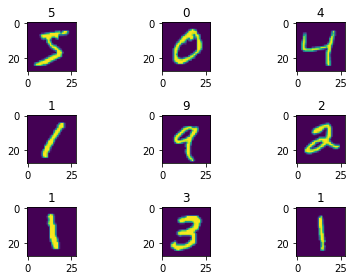

In [2]:
#load the MNIST dataset with binary pixel values
data = sio.loadmat('mnist.mat')
print(data)



Xtrain, Xtest = data['trainX'].astype(float), data['testX'].astype(float)
ytrain, ytest = data['trainY'][0], data['testY'][0]

#pull and plot some samples
for k in range(9):
    plot_data = Xtrain[k,:]
    plot_data = np.reshape(plot_data,(28,28))
    plot_label = ytrain[k]
    plt.subplot(3,3,k+1)
    plt.imshow(plot_data)
    plt.title(plot_label)
plt.tight_layout()

In [3]:
#load the MNIST dataset with binary pixel values
data = sio.loadmat('mnist.mat')
print(data)


select_train = np.logical_or(np.equal(ytrain,4),np.equal(ytrain,9))
select_test = np.logical_or(np.equal(ytest,4),np.equal(ytest,9))
Xtrain = Xtrain[select_train,:]
Xtest = Xtest[select_test,:]
ytrain = np.sign(np.equal(ytrain[select_train],4.)-.5)
ytest = np.sign(np.equal(ytest[select_test],4.)-.5)


m,n = Xtrain.shape
mt = Xtest.shape[0]


{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Oct 18 19:00:09 2017', '__version__': '1.0', '__globals__': [], 'testX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'testY': array([[7, 2, 1, ..., 4, 5, 6]], dtype=uint8), 'trainY': array([[5, 0, 4, ..., 5, 6, 8]], dtype=uint8), 'trainX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}


Check number:  45.19215648734919 12343.17694760448
Classification Accuracy: 0.49546264099737086
(784,) (11791, 784) (11791,) (784,)
One Step Classification Accuracy: 0.49546264099737086
10 : 0.49961835298108725 0.4982420894023104 38.630844592225415
20 : 0.5058943261809855 0.4972375690607735 33.66036979242367
30 : 0.5064031888728692 0.5067805123053741 29.955255775165412
40 : 0.5114070053430583 0.5092918131592165 27.170798353635405
50 : 0.5180222203375456 0.5097940733299849 25.09333864091502
60 : 0.5214146382834365 0.5118031140130588 23.542110701067006
70 : 0.526503265202273 0.5113008538422903 22.357766975992043
80 : 0.5293868204562802 0.5123053741838273 21.437500022899393
90 : 0.5314222712238148 0.5173279758915118 20.714909657966707
100 : 0.5323551861589347 0.5183324962330487 20.140745346462065
110 : 0.535238741412942 0.5228528377699648 19.67175364537521
120 : 0.538631159358833 0.527373179306881 19.28462809469847
130 : 0.5428716817911967 0.5283776996484179 18.956627457917847
140 : 0.546

1300 : 0.7258926299720125 0.712707182320442 8.081002228588641
1310 : 0.7269951658044271 0.7142139628327474 8.042814807639527
1320 : 0.7282673225341362 0.7157207433450528 8.005119367270748
1330 : 0.729454668815198 0.7157207433450528 7.967912202617492
1340 : 0.7304723941989653 0.7172275238573581 7.931188379718259
1350 : 0.7320837927232635 0.7192365645404319 7.89494103736292
1360 : 0.7334407599016198 0.7222501255650426 7.859161541515385
1370 : 0.734712916631329 0.7232546459065796 7.823840224397455
1380 : 0.7354762106691545 0.7237569060773481 7.788967206591137
1390 : 0.7363243151556271 0.7237569060773481 7.754532967447672
1400 : 0.7375964718853363 0.7262682069311903 7.72052860899408
1410 : 0.738444576371809 0.7272727272727273 7.686945913945408
1420 : 0.7397167331015181 0.7287795077850326 7.653777290260792
1430 : 0.74090407938258 0.7292817679558011 7.621015611035685
1440 : 0.7415825629717582 0.730286288297338 7.588653917490532
1450 : 0.742176236112289 0.7317930688096433 7.556685009968277
14

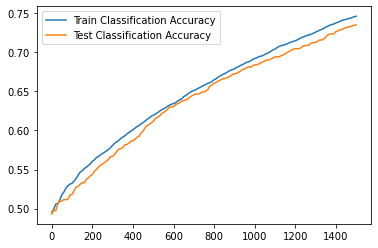

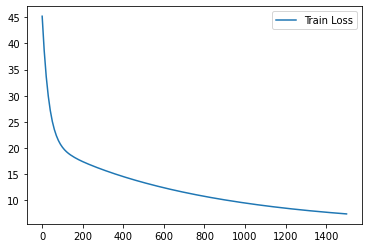

Final Train Classification Accuracy: 0.7461623271987109
Final Test Classification Accuracy: 0.7353088900050226
Final Train Loss: 7.402435856889011
196.49025964736938  seconds to run code


In [26]:
def getLossFunction(theta):
    total = 0
    for i in range(m):
        total += math.log(1 / ( 1 + math.exp(-1*ytrain[i]*np.matmul(Xtrain[i].T,theta))))
    
    return ((-1/m)*total)

def getGradient(theta):
    grad = []
    for i in range(m):
        sigma = 1 / ( 1 + math.exp(-1*ytrain[i]*np.matmul(Xtrain[i].T,theta)))
        grad.append((sigma - 1) * ytrain[i] * Xtrain[i])
#         print(grad[-1])
    final_grad = (1/m)*np.sum(grad, axis=0)
    return final_grad

def get_class_accuracy(theta1, X,y):
    yhat = np.zeros(len(y))
    total = 0
    for i in range(len(y)):
        if(np.matmul(X[i].T,theta1)>0):
            yhat[i] = 1
        else:
            yhat[i] = -1
    
        if(yhat[i] == y[i]):
            total += 1
    
    return total / len(y)

# TEST SCRIPT. DO NOT MODIFY!
theta = np.linspace(-.1,.1,n)
print('Check number: ', getLossFunction(theta),np.sum(getGradient(theta)))

print('Classification Accuracy:',get_class_accuracy(theta,Xtrain,ytrain))
print(theta.shape, Xtrain.shape, ytrain.shape, getGradient(theta).shape)
def gradient_descent( theta1, step_size):
    gradient = getGradient(theta1)
#     print(theta.shape,gradient.shape)
    theta2 = theta1 - (step_size*gradient)
    return theta2

one_step_theta = gradient_descent(theta, 10**(-6))
print('One Step Classification Accuracy:',get_class_accuracy(one_step_theta,Xtrain,ytrain))

start = time()
train_accuracy = [get_class_accuracy(theta,Xtrain,ytrain)]
test_accuracy = [get_class_accuracy(theta,Xtest,ytest)]
train_loss = [getLossFunction(theta)]
for i in range(1,1501):
    theta = gradient_descent(theta, 10**(-6))
    if(i % 10 == 0):
        train_accuracy.append(get_class_accuracy(theta,Xtrain,ytrain))
        test_accuracy.append(get_class_accuracy(theta,Xtest,ytest))
        train_loss.append(getLossFunction(theta))
        print(i,":",train_accuracy[-1], test_accuracy[-1], train_loss[-1])

plt.plot(range(0,1501,10), train_accuracy, label = "Train Classification Accuracy")
plt.plot(range(0,1501,10), test_accuracy, label = "Test Classification Accuracy")
plt.legend()
plt.show()    

plt.plot(range(0,1501,10), train_loss, label = "Train Loss")
plt.legend()
plt.show()

print("Final Train Classification Accuracy:", train_accuracy[-1])
print("Final Test Classification Accuracy:", test_accuracy[-1])
print("Final Train Loss:", train_loss[-1])
print(time()-start, ' seconds to run code')

##     
def getStochGradient(theta, minibatch):
    return theta
    
# TEST SCRIPT. DO NOT MODIFY!
theta = np.linspace(-.1,.1,n)
print('Check number: ',np.sum(getStochGradient(theta,[1,4,6,2])))


Check number:  5803.5
100 : 0.5319311339156985 0.5183324962330487 20.179506670150896
200 : 0.5590704774828259 0.544952285283777 17.39827965894216
300 : 0.5822237299635316 0.5680562531391261 15.804123201556784
400 : 0.6020693749469934 0.5926670015067805 14.488326026287345
500 : 0.6194555169196845 0.6137619286790558 13.365339172714705
600 : 0.6343821558816046 0.629331993972878 12.399220800343302
700 : 0.6509201933678229 0.6449020592667002 11.50354156556535
800 : 0.6658468323297431 0.6589653440482169 10.732900656396065
900 : 0.6792468832160122 0.6720241084881969 10.071211356004067
1000 : 0.6925621236536341 0.6835760924158715 9.45977142396436
1100 : 0.7034178610804851 0.6921145153189352 8.943910902819256
1200 : 0.7160546179289289 0.7031642390758412 8.473597827926058
1300 : 0.7255533881774234 0.7137117026619789 8.06930318715644
1400 : 0.7374268509880417 0.724761426418885 7.717018960980215
1500 : 0.7465015689933 0.7353088900050226 7.396803788099602
1600 : 0.7543889407174964 0.744349573078854

13100 : 0.9063692646934103 0.891511803114013 2.6073829211006982
13200 : 0.9065388855907047 0.8920140632847815 2.601506651399726
13300 : 0.9073869900771775 0.8910095429432446 2.5956905995374786
13400 : 0.9069629378339411 0.8920140632847815 2.588182054026439
13500 : 0.9078958527690612 0.8920140632847815 2.580959571441469
13600 : 0.9078110423204139 0.89251632345555 2.574358737499335
13700 : 0.9083199050122975 0.8920140632847815 2.5684553043328404
13800 : 0.9078958527690612 0.8920140632847815 2.5631432181887477


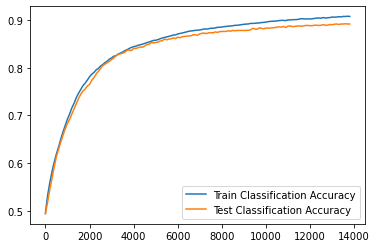

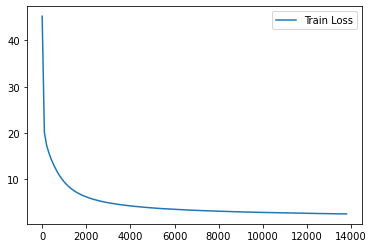

Final Train Classification Accuracy: 0.9078958527690612
Final Test Classification Accuracy: 0.8920140632847815
Final Train Loss: 2.5631432181887477
20.043118715286255  seconds to run code


In [41]:
def getStochGradient(theta, minibatch):
    grad = np.zeros(len(theta))
    for i in minibatch:
        sigma = 1 / ( 1 + math.exp(-1*ytrain[i]*np.matmul(Xtrain[i].T,theta)))
        grad += (sigma - 1) * ytrain[i] * Xtrain[i]
    return (1/len(minibatch))*grad
    
# TEST SCRIPT. DO NOT MODIFY!
theta = np.linspace(-.1,.1,n)
print('Check number: ',np.sum(getStochGradient(theta,[1,4,6,2])))

def stoch_gradient_descent(theta1, minibatch,step_size):
    gradient = getStochGradient(theta1, minibatch)
    theta2 = theta1 - (step_size*gradient)
    return theta2


start = time()

random_range = np.arange(len(Xtrain))
np.random.shuffle(random_range)
minibatches = np.array_split(random_range, len(random_range)/50)
current_mini = 0

stoch_train_accuracy = [get_class_accuracy(theta,Xtrain,ytrain)]
stoch_test_accuracy = [get_class_accuracy(theta,Xtest,ytest)]
stoch_obj_loss = [getLossFunction(theta)]
for i in range(1,50001):
# prev_theta = np.ones(len(theta))
# i = 1
# while( not np.array_equal((theta / np.linalg.norm(theta)).round(8),prev_theta.round(8)) ):
#     i+=1
#     prev_theta = theta / np.linalg.norm(theta)
    theta = stoch_gradient_descent(theta, minibatches[current_mini], 10**(-6))
    
    current_mini += 1
    
    if(current_mini == len(minibatches)):
        random_range = np.arange(len(Xtrain))
        np.random.shuffle(random_range)
        minibatches = np.array_split(random_range, len(random_range)/50)
        current_mini = 0

    if(i % 100 == 0):
        stoch_train_accuracy.append(get_class_accuracy(theta,Xtrain,ytrain))
        stoch_test_accuracy.append(get_class_accuracy(theta,Xtest,ytest))
        stoch_obj_loss.append(getLossFunction(theta))
        print(i,":",stoch_train_accuracy[-1], stoch_test_accuracy[-1], stoch_obj_loss[-1])
plt.plot(range(0,50001,100), stoch_train_accuracy, label = "Train Classification Accuracy")
plt.plot(range(0,50001,100), stoch_test_accuracy, label = "Test Classification Accuracy")
plt.legend()
plt.show()    
plt.plot(range(0,i+1,100), stoch_obj_loss, label = "Train Loss")
plt.legend()
plt.show()        

print("Final Train Classification Accuracy:", stoch_train_accuracy[-1])
print("Final Test Classification Accuracy:", stoch_test_accuracy[-1])
print("Final Train Loss:", stoch_obj_loss[-1])

print(time()-start, ' seconds to run code')

In [5]:
#you can use time() to measure runtime of things.
#sample runtime code: 
print("hello")
def do_stuff_takes_nseconds(n):
    sleep(n/1000)
start = time()
do_stuff_takes_nseconds(n)
print(time()-start, ' seconds to run code')

hello
0.7847766876220703  seconds to run code
